In [74]:
import pandas as pd,matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline
df = pd.read_csv("GermanCredit.csv",sep=',',header=0)
predictors,predicted = df.columns.values[1:-1],df.columns.values[-1]
train,cv = model_selection.train_test_split(df,test_size=0.4)
cv,test = model_selection.train_test_split(cv,test_size=0.5)
print "The predictor variables are:",predictors
print "Training Set Length:",len(train)
print "Cross Validation Set Length:",len(cv)
print "Test Set Length:",len(test)

The predictor variables are: ['CHK_ACCT' 'DURATION' 'HISTORY' 'NEW_CAR' 'USED_CAR' 'FURNITURE'
 'RADIO/TV' 'EDUCATION' 'RETRAINING' 'AMOUNT' 'SAV_ACCT' 'EMPLOYMENT'
 'INSTALL_RATE' 'MALE_DIV' 'MALE_SINGLE' 'MALE_MAR_or_WID' 'CO-APPLICANT'
 'GUARANTOR' 'PRESENT_RESIDENT' 'REAL_ESTATE' 'PROP_UNKN_NONE' 'AGE'
 'OTHER_INSTALL' 'RENT' 'OWN_RES' 'NUM_CREDITS' 'JOB' 'NUM_DEPENDENTS'
 'TELEPHONE' 'FOREIGN']
Training Set Length: 600
Cross Validation Set Length: 200
Test Set Length: 200


In [75]:
df[df.columns.values[:(len(df.columns)/2)]].describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,1.105000,2.384000,2.973000,0.050000,0.54800
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,1.580023,1.208306,1.118715,0.218054,0.49794
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,0.000000,2.000000,2.000000,0.000000,0.00000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,0.000000,2.000000,3.000000,0.000000,1.00000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,2.000000,4.000000,4.000000,0.000000,1.00000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,4.000000,4.000000,1.000000,1.00000


In [76]:
for pair in sorted(zip(tree.DecisionTreeClassifier().fit(train[predictors],train[predicted]).feature_importances_,predictors),reverse=True): 
    print pair


(0.14122060136793271, 'AMOUNT')
(0.13508884082572559, 'AGE')
(0.13169244319403337, 'DURATION')
(0.1278340951022747, 'CHK_ACCT')
(0.077853894745496005, 'EMPLOYMENT')
(0.049663292767287481, 'SAV_ACCT')
(0.044025917479532467, 'HISTORY')
(0.041925041925041928, 'INSTALL_RATE')
(0.032508768273917472, 'NUM_CREDITS')
(0.022144981170653864, 'OTHER_INSTALL')
(0.021949343192866521, 'RETRAINING')
(0.019381102956618847, 'CO-APPLICANT')
(0.019180494950077395, 'REAL_ESTATE')
(0.0166694450587942, 'FURNITURE')
(0.016037227530397578, 'GUARANTOR')
(0.015913228348461504, 'MALE_SINGLE')
(0.014634743621617818, 'NEW_CAR')
(0.013145663861908893, 'MALE_DIV')
(0.012612583011321458, 'PROP_UNKN_NONE')
(0.012590546269302737, 'JOB')
(0.012096153041224546, 'PRESENT_RESIDENT')
(0.011321490258187739, 'USED_CAR')
(0.0050922330715076815, 'TELEPHONE')
(0.0050922330715076815, 'MALE_MAR_or_WID')
(0.00032563490430958153, 'NUM_DEPENDENTS')
(0.0, 'RENT')
(0.0, 'RADIO/TV')
(0.0, 'OWN_RES')
(0.0, 'FOREIGN')
(0.0, 'EDUCATION')


In [77]:
from sklearn.grid_search import GridSearchCV
log_reg_params = {'penalty' : ('l1','l2')}
log_reg = GridSearchCV(linear_model.LogisticRegression(),log_reg_params)

decision_tree_params = {'criterion' : ['gini','entropy'],
                        'max_depth' : [3,4,5,6,8,None],
                        'min_samples_split' : [2,4,8,16],
                        'min_impurity_split' : [1e-7,1e-6,1e-5,1e-4]}
decision_tree = GridSearchCV(tree.DecisionTreeClassifier(),decision_tree_params)
neural_network_params = {'activation' : ['relu','logistic','tanh'],
                         'hidden_layer_sizes' : [(5,2),(10,2),(3,3),(5,1)]}
neural_net = GridSearchCV(neural_network.MLPClassifier(),neural_network_params)

lda_params = {'solver' : ['svd','lsqr','eigen']}
lda = GridSearchCV(discriminant_analysis.LinearDiscriminantAnalysis(),lda_params)

In [78]:
chosen = ['AMOUNT','CHK_ACCT','DURATION','AGE','EMPLOYMENT','HISTORY','SAV_ACCT','PRESENT_RESIDENT','REAL_ESTATE','OTHER_INSTALL','SAV_ACCT','FURNITURE','NEW_CAR','JOB','INSTALL_RATE']

In [79]:
log_reg.fit(train[chosen],train[predicted])
print "Logistic Regression"
print "Train accuracy: ",log_reg.score(train[chosen],train[predicted])
print "Cross Validation accuracy: ",log_reg.score(cv[chosen],cv[predicted]),"\n"

decision_tree.fit(train[chosen],train[predicted])
print "Decision Tree"
print "Train accuracy: ",decision_tree.score(train[chosen],train[predicted])
print "Cross Validation accuracy: ",decision_tree.score(cv[chosen],cv[predicted]),"\n"

neural_net.fit(train[chosen],train[predicted])
print "Neural Network"
print "Train accuracy: ",neural_net.score(train[chosen],train[predicted])
print "Cross Validation accuracy: ",neural_net.score(cv[chosen],cv[predicted]),"\n"

lda.fit(train[chosen],train[predicted])
print "Linear Discriminant Analysis"
print "Train accuracy: ",lda.score(train[chosen],train[predicted])
print "Cross Validation accuracy: ",lda.score(cv[chosen],cv[predicted]),"\n"


Logistic Regression
Train accuracy:  0.756666666667
Cross Validation accuracy:  0.765 

Decision Tree
Train accuracy:  0.813333333333
Cross Validation accuracy:  0.745 

Neural Network
Train accuracy:  0.321666666667
Cross Validation accuracy:  0.295 

Linear Discriminant Analysis
Train accuracy:  0.755
Cross Validation accuracy:  0.775 



## 3. For the German credit data (bagging and boosting):

* Do we use all predictors or the ones we selected last time?
* Am I using the correct value for lift?
* If there are any changes, make sure to change 3. d)!

In [60]:
from ggplot import *
default_rf = ensemble.RandomForestClassifier().fit(train[predictors],train[predicted])
rf_preds = default_rf.predict_proba(test[predictors])

default_adaboost = ensemble.GradientBoostingClassifier().fit(train[predictors],train[predicted])
boost_preds = default_adaboost.predict_proba(test[predictors])

default_decision = tree.DecisionTreeClassifier().fit(train[predictors],train[predicted])
decision_preds = default_decision.predict_proba(test[predictors])

### 3. a) Using a classification tree, determine overall test accuracy and lift at 0.10

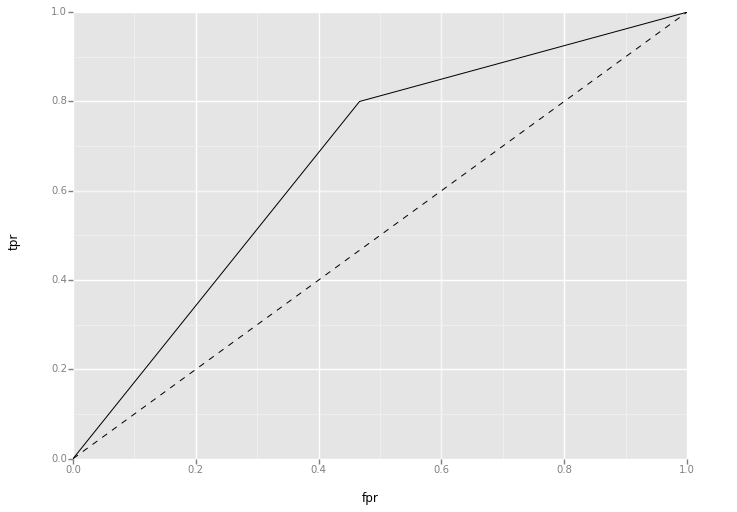

<ggplot: (20632706)>

In [62]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), decision_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [63]:
print df
print "Lift at 0.10 is: ", df.tpr.ix[1]/df.fpr.ix[1]

        fpr  tpr
0  0.000000  0.0
1  0.466667  0.8
2  1.000000  1.0
Lift at 0.10 is:  1.71428571429


In [64]:
default_decision.score(test[predictors],test[predicted])

0.71999999999999997

The lift at 0.10 is about 1.7 which means that for every 17 true positives, you are likely to hit 10 false positives. Also, the overall test accuracy is about 72 percent.

### 3. b) Using a Boosted Tree, determine overall test accuracy and lift at 0.10

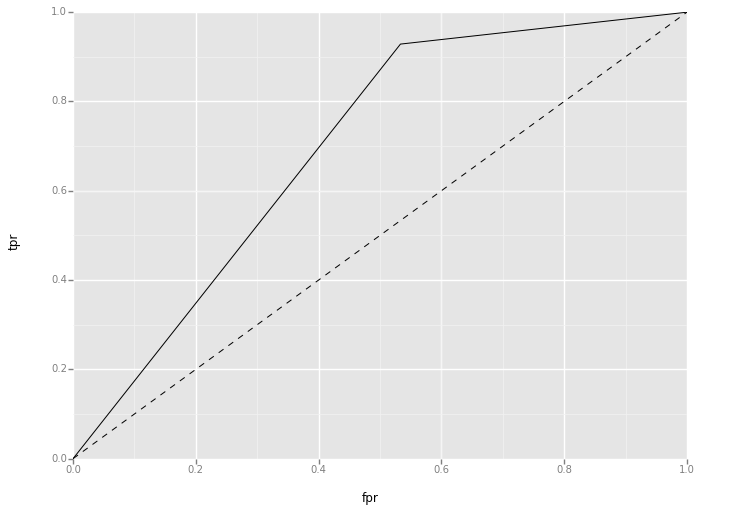

<ggplot: (21901793)>

In [65]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), boost_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [66]:
print df
print "Lift at 0.10 is: ", df.tpr.ix[1]/df.fpr.ix[1]

        fpr       tpr
0  0.000000  0.000000
1  0.533333  0.928571
2  1.000000  1.000000
Lift at 0.10 is:  1.74107142857


In [67]:
default_adaboost.score(test[predictors],test[predicted])

0.79000000000000004

The lift at 0.10 is 1.74 and the overall test accuracy is 79 percent.

### 3. c) Using Bootstrap Forest, determine overall test accuracy and lift at 0.10

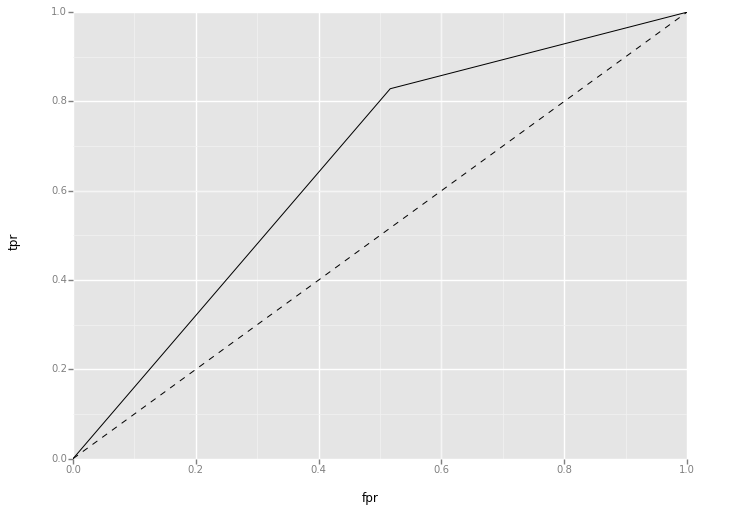

<ggplot: (21910332)>

In [68]:
fpr, tpr, _ = metrics.roc_curve(test[predicted].as_matrix(), rf_preds.argmax(axis=1))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [69]:
print df
print "Lift at 0.10 is: ", df.tpr.ix[1]/df.fpr.ix[1]

        fpr       tpr
0  0.000000  0.000000
1  0.516667  0.828571
2  1.000000  1.000000
Lift at 0.10 is:  1.60368663594


In [70]:
default_rf.score(test[predictors],test[predicted])

0.72499999999999998

The lift at 0.10 is 1.60 and the overall test accuracy is about 72.5 percent.

### 3. d) Comparing the models: Which model has the best test accuracy? Compare the lift curves? Which model does the best job?

The boosted tree appears to have the best test accuracy of 79 percent. The boosted tree leads by a margin of about 7 percent over Bootstrap forest and a normal classification tree. Furthermore, the lift curve for the boosted tree has the steepest initial lift slope with the classification tree in second and bootstrap forest in last place. Overall, the boosted tree is the model that does the best job based on our observations.